# Homework 7

Teach a NN model to predict the prices of the houses from the `kc_house_data.csv'` dataset. 

* clean the data (NaN, repeated values, correlation...)
***I forgot to mention that the target (here `price`) should not be taken into account when making the correlation matrix***!!
* remove outliers (very large, very small values)
* split into train and test 
* use functions:
  * `get_model(input_shape)`
  * `get_regularized_model(input_shape,weight_decay,drop_ate)`
  * `compile_model()`
* use `metrics=['mape']` when compiling model
* `scores=model.evaluate(X_test,y_test)` should return mean absolute percentage error
* use ModelCheckpoint() callback to save the entire model into `.h5` file
* (you can possibly normalize the data before training the algorithm) check this out

    * "id": Numero de identificacion de la vivienda
    * "Date": Fecha en que se vendió la casa
    * "Price": el precio es el objetivo de predicción
    * "Bedrooms": Número de Dormitorios/Casa
    * "Bathrooms": Número de baños/Casa
    * "Sqft_Living": pies cuadrados de la casa
    * "Sqft_Lot": pies cuadrados del lote
    * "Floors": Total de pisos oniveles) en casa
    * "Waterfront": Casa que tiene vista a la costanera
    * "View": Ha sido visto
    * "Condition": Qué tan buena es la condición ogeneral)
    * "Grade": calificación de vivienda, según el sistema del condado de King
    * "Sqft_above": pies cuadrados de la casa aparte del sótano
    * "Sqft_Basement": pies cuadrados del sótano
    * "Yr_Built": año de construcción
    * "Yr_Renovated": año en que se renovó la casa
    * "Zipcode": código postal
    * "Lat": Coordenada de latitud
    * "Long": Coordenada de longitud
    * "Sqft_Living15": Área de la sala de estar en 2015 oimplica algunas renovaciones)
    * "Sqft_Lot15": área del tamaño del lote en 2015 oimplica algunas renovaciones) 

1. Importar, leer e inspeccionar los datos
  * `df.head()`
  * `df.tail()` 
  * `df.columns()`
  * `df.describe()`
  * `df.info()`
  * `df.loc[mascara]` - selecione filas usando "mascara" (ejemplo de mascara (condicion logica): `df['id']>100`) 
2. Completar los datos y organizar las columnas
  * `df.merge()`
  * `df[df.duplicated()] ` - visualiza filas con valores duplicadas atraves todas columnas
  * `df.drop_duplicates(subset=['nombre_columna'])` - eliminar valor duplicadas en la columna
  * `df.drop(['nombre_columna'], axis=1)`           - eliminar columnas innecesarias o repetidas usando funcion
  * `df['nueva_columna']=df['nueva_columna']/10.764` añadir otros nuevos (utilizando cálculos)
  * `df.rename(columns={'nombre_columna_vieja': 'nombre_columna_nueva'})` cambiar el nombre de las columna
  * `df['nombre_columna'] = df['nombre_columna'].astype(str)` cambiar tipo de valores de la columna
3. Comprobar de los tipos de datos y eliminar de los valores repetidos, y `Nan`
  * `df.info()` 
  * `df.isnull().sum()` - soma de todas valores vacios en cada columna
  * `df.isna().sum()`  - soma de todas valores NaN en cada columna
  * `df['sqft_lot'].isnull()` - mascara logica de todos valores null util combinando con `df[mascara]`
  * `df.dropna()` - elimina valores Nan, parametro `axis=0` significa eliminar todas filas con valor NaN
4. Revisar y comprender los datos
  * `df['nombre_columna'].unique()`      - visualizar valores uniqas de la columna
  * `df['nombre_columna'].value_counts()` - sumar frequencia de valores de la columna (se usa para columnas con valores discretos)
  * `df.groupby(['nombre_columna_1','nombre_columna_1']).mean()`
  * `df['nombre_columna'].nlargest(10)` - visualiza 10 mas grandes valore numericas de la columna
  * `df.info()`
  * `df.describe()`
5. Compruebar la correlación entre variables y eliminar las que tengan una correlación superior a 0,8 
  * `corr()`
6. Buscar y eliminar valores atípicos
  * mirar las estadísticas de `df.describe()` max() min()   
  * `df.groupby`
  * histogramas 
  * IQR y boxplot `seaborn.boxplot()`
7. Comprobar la normalidad de la distribución de continua variable
  * `distplot()`
8. Búscar de linealidad y relación general entre variables
  * `pairplot()`
9. Identificar de variables categóricas
  * `matplotlib.scatter_plot()`
  * `seaborn.scatter_plot()`
10. Extraer otras informaciónes válida, por ejemplo usando series de tiempo (time series )
  * `pandas.to_datetime()`
  * `pandas.DatetimeIndex()`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
import seaborn as sns           #visualisation
import scipy.stats as stats

# Exploring the data

In [2]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv',sep=',')

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819.0,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711.0,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470.0,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560.0,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df.shape


(21615, 21)

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.isna().sum()
df = df.dropna()

In [7]:
df[df.duplicated()]
df = df.drop_duplicates()

df.shape


(21612, 21)

<AxesSubplot:>

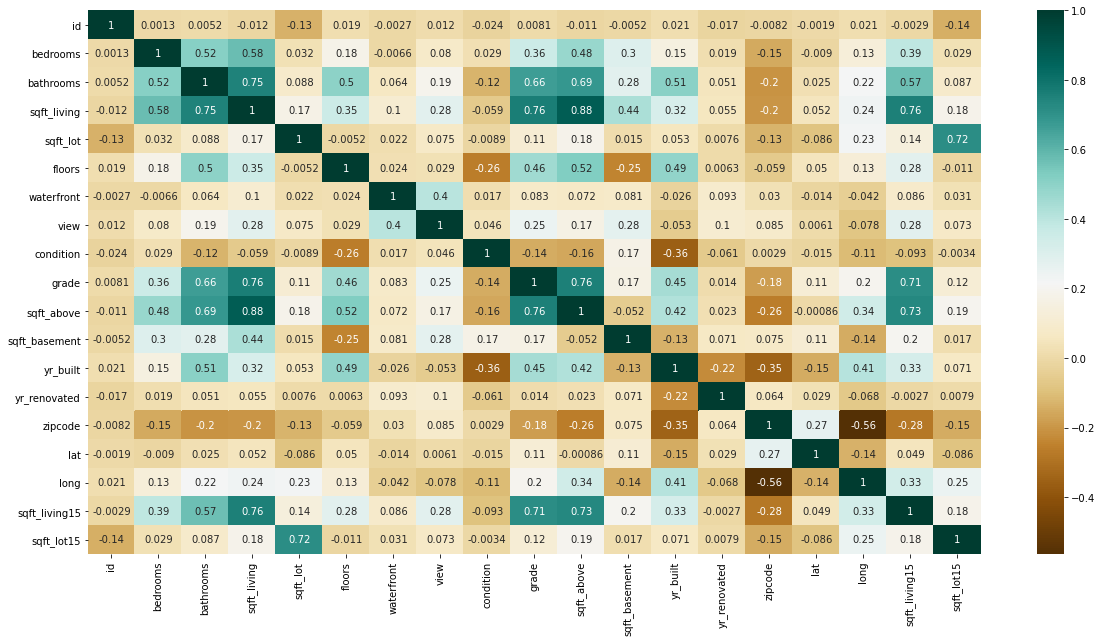

In [8]:
plt.figure(figsize=(20,10))
correlation_values= df.drop(['price'],axis=1).corr()
sns.heatmap(correlation_values,cmap='BrBG',annot=True)

"sqft_living" and "sqft_above" are correlated as their correlation parameter is about 0.88, so we can remove one of those.

In [9]:
df=df.drop(['sqft_living','sqft_living15','sqft_lot15','long','grade','view'],axis=1)

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580350e+09,5.401044e+05,3.370905,2.114774,1.510755e+04,1.494332,0.007542,3.409402,1788.416065,291.522534,1971.004488,84.406163,98077.934249,47.560061
std,2.876623e+09,3.671279e+05,0.930037,0.770177,4.142138e+04,0.539991,0.086519,0.650746,828.101734,442.580840,29.373936,401.688123,53.500031,0.138562
min,1.000102e+06,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900
25%,2.123049e+09,3.219875e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471075
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,7.619000e+03,1.500000,0.000000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,1.068825e+04,2.000000,0.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600


# Looking for outliers

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

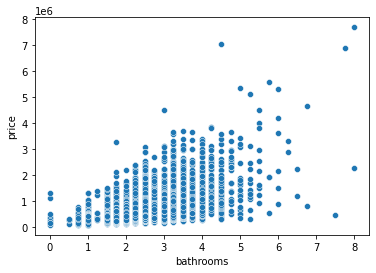

In [11]:
sns.scatterplot(data=df,x='bathrooms',y='price')


<AxesSubplot:xlabel='bathrooms'>

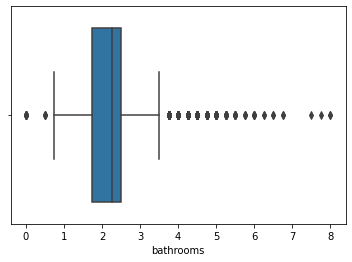

In [12]:
sns.boxplot(x=df['bathrooms'])

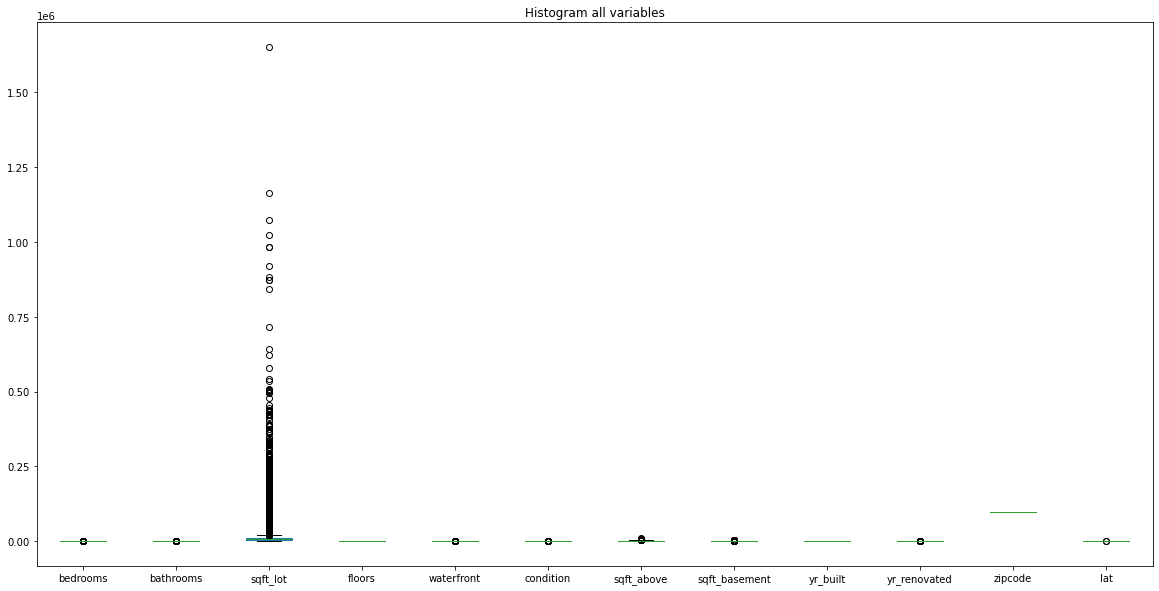

In [13]:
df.drop(['id','price'],axis=1).plot(kind='box', figsize=(20,10),title='Histogram all variables');


In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [15]:
zscore_outliers_max=(df[(np.abs(stats.zscore(df['bathrooms'])) > 3)].shape[0]/df.shape[0])*100
print(f'{zscore_outliers_max:.2f} %')

0.87 %


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

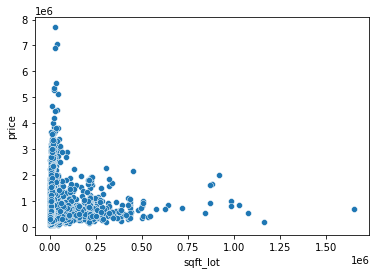

In [16]:
sns.scatterplot(data=df,x='sqft_lot',y='price')


For "bedrooms" and "bathrooms" is easy to see that a good cut for the data is in the range (0,20] and (0,6] respectively. For "sqft_lot" I used the 3 sigma criteria. 

In [17]:
df = df[df['bedrooms'] <= 20]
df = df[df['bedrooms'] > 0]
df = df[df['bathrooms'] <= 6]
df = df[df['bathrooms'] > 0]

df.shape

(21585, 15)

In [18]:
df_out = df[((df['sqft_lot'] < (Q1['sqft_lot'] - 1.5 * IQR['sqft_lot'])) | (df['sqft_lot'] > (Q3['sqft_lot'] + 1.5 * IQR['sqft_lot'])))]
df_out


,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
5,7237550310,20140512T000000,1225000.0,4,4.50,101930.0,1.0,0,3,3890,1530,2001,0,98053,47.6561
12,114101516,20140528T000000,310000.0,3,1.00,19901.0,1.5,0,4,1430,0,1927,0,98028,47.7558
21,2524049179,20140826T000000,2000000.0,3,2.75,44867.0,1.0,0,3,2330,720,1968,0,98040,47.5316
36,9435300030,20140528T000000,550000.0,4,1.00,34848.0,1.0,0,1,930,730,1933,0,98052,47.6621
41,7766200013,20140811T000000,775000.0,4,2.25,24186.0,1.0,0,3,2600,1620,1984,0,98166,47.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21488,98300230,20150428T000000,1459000.0,4,4.00,130208.0,2.0,0,3,4620,0,2014,0,98024,47.5885
21496,2413910120,20140702T000000,915000.0,3,4.50,62726.0,2.0,0,3,3120,730,2013,0,98053,47.6735
21522,7237550100,20140825T000000,1408760.0,4,4.00,50621.0,2.0,0,3,4280,640,2012,0,98053,47.6575
21527,2625069038,20141124T000000,1450000.0,4,3.50,108865.0,2.0,0,3,4300,0,2014,0,98074,47.6258


In [19]:
list(df_out['id'])
#df['id'].isin(df_out['id'])
df_sed = df
df = df_sed[~df_sed['id'].isin(df_out['id'])]
df

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,7129300520,20141013T000000,221900.0,3,1.00,5650.0,1.0,0,3,1180,0,1955,0,98178,47.5112
1,6414100192,20141209T000000,538000.0,3,2.25,7242.0,2.0,0,3,2170,400,1951,1991,98125,47.7210
2,5631500400,20150225T000000,180000.0,2,1.00,10000.0,1.0,0,3,770,0,1933,0,98028,47.7379
3,2487200875,20141209T000000,604000.0,4,3.00,5000.0,1.0,0,5,1050,910,1965,0,98136,47.5208
4,1954400510,20150218T000000,510000.0,3,2.00,8080.0,1.0,0,3,1680,0,1987,0,98074,47.6168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,20140521T000000,360000.0,3,2.50,1131.0,3.0,0,3,1530,0,2009,0,98103,47.6993
21611,6600060120,20150223T000000,400000.0,4,2.50,5813.0,2.0,0,3,2310,0,2014,0,98146,47.5107
21612,1523300141,20140623T000000,402101.0,2,0.75,1350.0,2.0,0,3,1020,0,2009,0,98144,47.5944
21613,291310100,20150116T000000,400000.0,3,2.50,2388.0,2.0,0,3,1600,0,2004,0,98027,47.5345


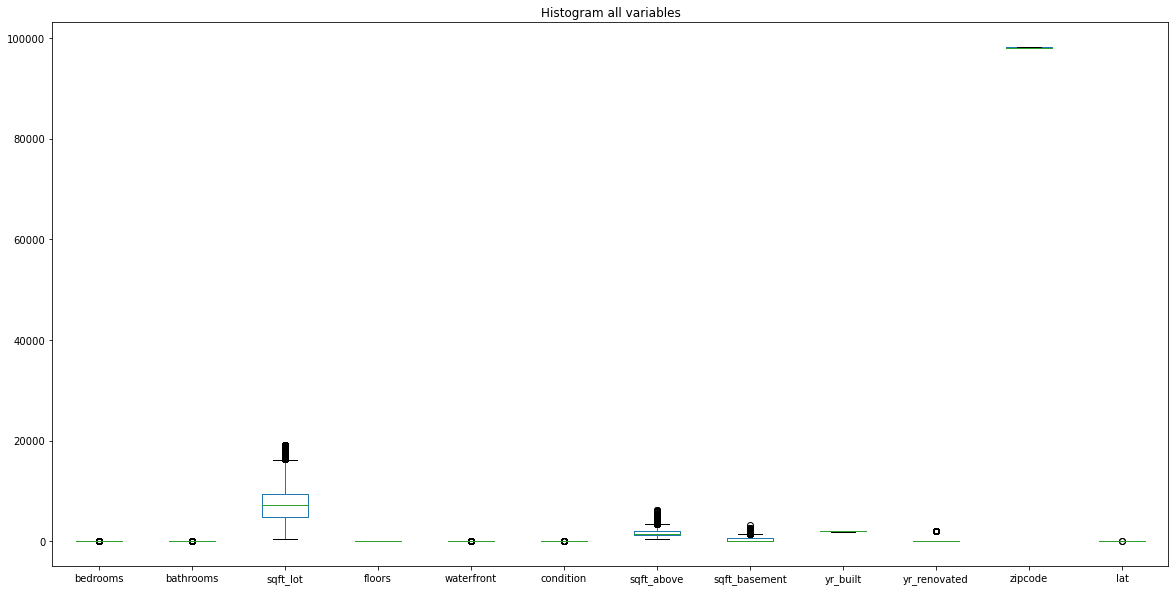

In [20]:
df.drop(['id','price'],axis=1).plot(kind='box', figsize=(20,10),title='Histogram all variables');



In [21]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

<ipython-input-21-9cd7c1baa3de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-21-9cd7c1baa3de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['date']).month


# Neuronal Network 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow import one_hot
from tensorflow.keras import regularizers

from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

my_checkpoint=ModelCheckpoint('Homework7_Andres.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1)

tf.random.set_seed(1234) 

In [23]:
X_data = df.drop(['id','price','date'], axis=1).to_numpy() # features into numpy arrays 
y_data = df[['price']].to_numpy()

# split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # Split the data 

# normalize data
x_scalar = preprocessing.StandardScaler() # Object from sklearn to scale 

X_train = x_scalar.fit_transform(X_train)
X_test = x_scalar.transform(X_test) 

print(np.shape(X_train))
print(np.shape(y_train))

print(X_data)


(15338, 13)
(15338, 1)
[[3.00000e+00 1.00000e+00 5.65000e+03 ... 9.81780e+04 4.75112e+01
  1.00000e+01]
 [3.00000e+00 2.25000e+00 7.24200e+03 ... 9.81250e+04 4.77210e+01
  1.20000e+01]
 [2.00000e+00 1.00000e+00 1.00000e+04 ... 9.80280e+04 4.77379e+01
  2.00000e+00]
 ...
 [2.00000e+00 7.50000e-01 1.35000e+03 ... 9.81440e+04 4.75944e+01
  6.00000e+00]
 [3.00000e+00 2.50000e+00 2.38800e+03 ... 9.80270e+04 4.75345e+01
  1.00000e+00]
 [2.00000e+00 7.50000e-01 1.07600e+03 ... 9.81440e+04 4.75941e+01
  1.00000e+01]]


# Model

In [24]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Dense(units=128,activation='relu',name='layer_hidden1'),   
                  Dense(units=128,activation='relu',name='layer_hidden2'),
                  Dense(units=128,activation='relu',name='layer_hidden3'),
                  Dense(units=128,activation='relu',name='layer_hidden4'),
                  Dense(units=128,activation='relu',name='layer_hidden5'),
                  Dense(units=128,activation='relu',name='layer_hidden6'),
                  Dense(units=128,activation='relu',name='layer_hidden7'),
                  Dense(units=128,activation='relu',name='layer_hidden8'),
                  Dense(units=1,activation='linear',name='output_layer')
                 ])
    return model



# Regularized model

In [25]:
def get_regularized_model(input_shape,wd, drop_ate):
    model=Sequential([InputLayer(input_shape=input_shape),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu"),
                Dense(units=1,activation='linear') # by default
    ])
    return model

# Compiler

In [26]:
def compile_model(model):
        model.compile(optimizer='adam',
              loss='mae',   
              metrics=['mape'])

# Fit

In [27]:
model = get_model(X_train[0].shape)
compile_model(model)

epochs=20
myhistory=model.fit(X_train, y_train,  epochs=epochs, validation_split=0.1, verbose=False)

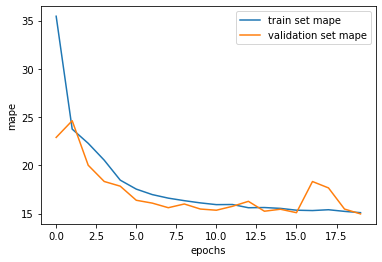

In [28]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['mape'],label='train set mape')
ax.plot(xvals, myhistory.history['val_mape'],label='validation set mape')
ax.set_xlabel('epochs')
ax.set_ylabel('mape')
ax.legend()

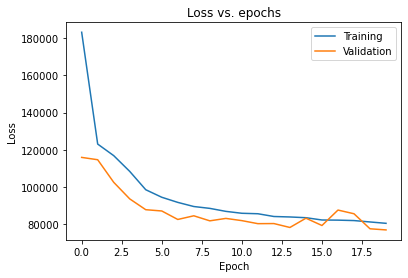

In [29]:
# Plot the training and validation loss

plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Evaluation

In [30]:
scores=model.evaluate(X_test,y_test)
print(scores)

120/120 [==============================] - 1s 9ms/step - loss: 78300.1484 - mape: 15.0689
[78300.1484375, 15.068947792053223]


# Using regularization

In [31]:
model = get_regularized_model(X_train[0].shape,0.000001,0)
compile_model(model)

epochs=20
myhistory=model.fit(X_train, y_train,  epochs=epochs, validation_split=0.1, verbose=False, callbacks=[my_checkpoint])


Epoch 00001: saving model to Homework7_Andres.h5

Epoch 00002: saving model to Homework7_Andres.h5

Epoch 00003: saving model to Homework7_Andres.h5

Epoch 00004: saving model to Homework7_Andres.h5

Epoch 00005: saving model to Homework7_Andres.h5

Epoch 00006: saving model to Homework7_Andres.h5

Epoch 00007: saving model to Homework7_Andres.h5

Epoch 00008: saving model to Homework7_Andres.h5

Epoch 00009: saving model to Homework7_Andres.h5

Epoch 00010: saving model to Homework7_Andres.h5

Epoch 00011: saving model to Homework7_Andres.h5

Epoch 00012: saving model to Homework7_Andres.h5

Epoch 00013: saving model to Homework7_Andres.h5

Epoch 00014: saving model to Homework7_Andres.h5

Epoch 00015: saving model to Homework7_Andres.h5

Epoch 00016: saving model to Homework7_Andres.h5

Epoch 00017: saving model to Homework7_Andres.h5

Epoch 00018: saving model to Homework7_Andres.h5

Epoch 00019: saving model to Homework7_Andres.h5

Epoch 00020: saving model to Homework7_Andres.h5


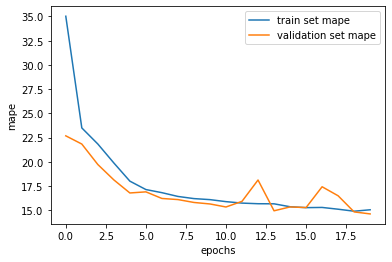

In [32]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['mape'],label='train set mape')
ax.plot(xvals, myhistory.history['val_mape'],label='validation set mape')
ax.set_xlabel('epochs')
ax.set_ylabel('mape')
ax.legend()

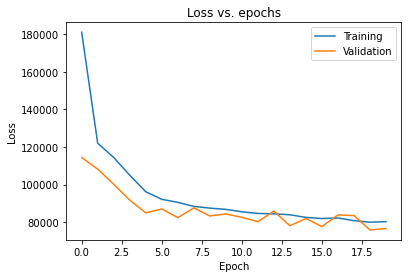

In [33]:
plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Evaluation 

In [34]:
scores=model.evaluate(X_test,y_test)
print(scores)

120/120 [==============================] - 1s 5ms/step - loss: 76887.0938 - mape: 14.5507
[76887.09375, 14.550715446472168]


**The complete study (data cleaning and NN implementation) resulted in a value, of the metric mape, about 15% using the following architecture**

* 8 hidden layers with 128 neurons and using "relu" as activation function in each of them 
* The output layer has 1 neuron and linear activation function
* L2 regularizer with $\alpha = 10^{-6}$
* Adam was used for the optimizer
* MSE as the loss function 
* Epochs = 20

**The model has a good performance but I think we can improve it, analizing most carefully whether some features can be removed and the normalization of the data** 
